In [1]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,mean_speed,max_speed,std_speed,mean_acceleration,max_acceleration,num_peaks,name,weight(kg),height(m),bar height(m),video,jump status
0,0.405274,5.796135,0.779352,-1.269454,24.568870,2,Steven Bastien,90,1.90,1.90,trimmed_1.mp4,1
1,0.215259,1.084163,0.186131,0.066196,8.038075,1,Garrett Scantling,95,1.91,1.96,trimmed_10.mp4,1
2,0.739617,18.499514,2.297320,-3.200867,139.266500,2,Garrett Scantling,95,1.91,1.99,trimmed_11.mp4,1
3,0.507853,5.204675,0.800430,1.263667,42.241979,2,Lindon Victor,82,1.85,1.99,trimmed_12.mp4,1
4,0.520975,5.760938,1.148973,0.369910,62.914924,3,Kai Kazmirek,88,1.90,1.99,trimmed_13.mp4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_speed         31 non-null     float64
 1   max_speed          31 non-null     float64
 2   std_speed          31 non-null     float64
 3   mean_acceleration  31 non-null     float64
 4   max_acceleration   31 non-null     float64
 5   num_peaks          31 non-null     int64  
 6   name               31 non-null     object 
 7   weight(kg)         31 non-null     int64  
 8   height(m)          31 non-null     float64
 9   bar height(m)      31 non-null     float64
 10  video              31 non-null     object 
 11  jump status        31 non-null     int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 3.0+ KB


In [5]:
df.describe()

,mean_speed,max_speed,std_speed,mean_acceleration,max_acceleration,num_peaks,weight(kg),height(m),bar height(m),jump status
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.361892,3.247946,0.536532,-0.157876,22.777403,2.774194,87.548387,1.906452,1.989032,0.516129
std,0.159831,3.457787,0.454281,0.842895,27.045596,1.856694,5.795623,0.054623,0.037537,0.508001
min,0.207536,0.814979,0.162676,-3.200867,3.745793,0.000000,73.000000,1.780000,1.900000,0.000000
25%,0.238209,1.222702,0.227970,-0.196412,7.589411,1.500000,82.000000,1.900000,1.960000,0.000000
50%,0.294940,1.865733,0.355948,0.034298,10.284417,2.000000,88.000000,1.910000,1.990000,1.000000
75%,0.416124,4.607226,0.782118,0.170674,28.181830,4.000000,92.000000,1.910000,2.020000,1.000000
max,0.745178,18.499514,2.297320,1.263667,139.266500,8.000000,97.000000,2.040000,2.050000,1.000000


In [6]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [7]:
AV= AutoViz_Class()

Shape of your Data Set loaded: (31, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['video']
To fix these data quality issues in the dataset, import FixD

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
mean_speed,float64,0.000000,NA,0.207536,0.745178,Column has 3 outliers greater than upper bound (0.68) or lower than lower bound(-0.03). Cap them or remove them.
max_speed,float64,0.000000,NA,0.814979,18.499514,Column has 1 outliers greater than upper bound (9.68) or lower than lower bound(-3.85). Cap them or remove them.
std_speed,float64,0.000000,NA,0.162676,2.297320,"Column has 1 outliers greater than upper bound (1.61) or lower than lower bound(-0.60). Cap them or remove them., Column has a high correlation with ['mean_speed', 'max_speed']. Consider dropping one of them."
mean_acceleration,float64,0.000000,NA,-3.200867,1.263667,Column has 7 outliers greater than upper bound (0.72) or lower than lower bound(-0.75). Cap them or remove them.
max_acceleration,float64,0.000000,NA,3.745793,139.266500,"Column has 2 outliers greater than upper bound (59.07) or lower than lower bound(-23.30). Cap them or remove them., Column has a high correlation with ['max_speed', 'std_speed']. Consider dropping one of them."
num_peaks,int64,0.000000,22,0.000000,8.000000,Column has 2 outliers greater than upper bound (7.75) or lower than lower bound(-2.25). Cap them or remove them.
name,object,0.000000,58,,,No issue
weight(kg),int64,0.000000,35,73.000000,97.000000,No issue
height(m),float64,0.000000,NA,1.780000,2.040000,Column has 12 outliers greater than upper bound (1.92) or lower than lower bound(1.88). Cap them or remove them.
bar height(m),float64,0.000000,NA,1.900000,2.050000,No issue


Number of All Scatter Plots = 28


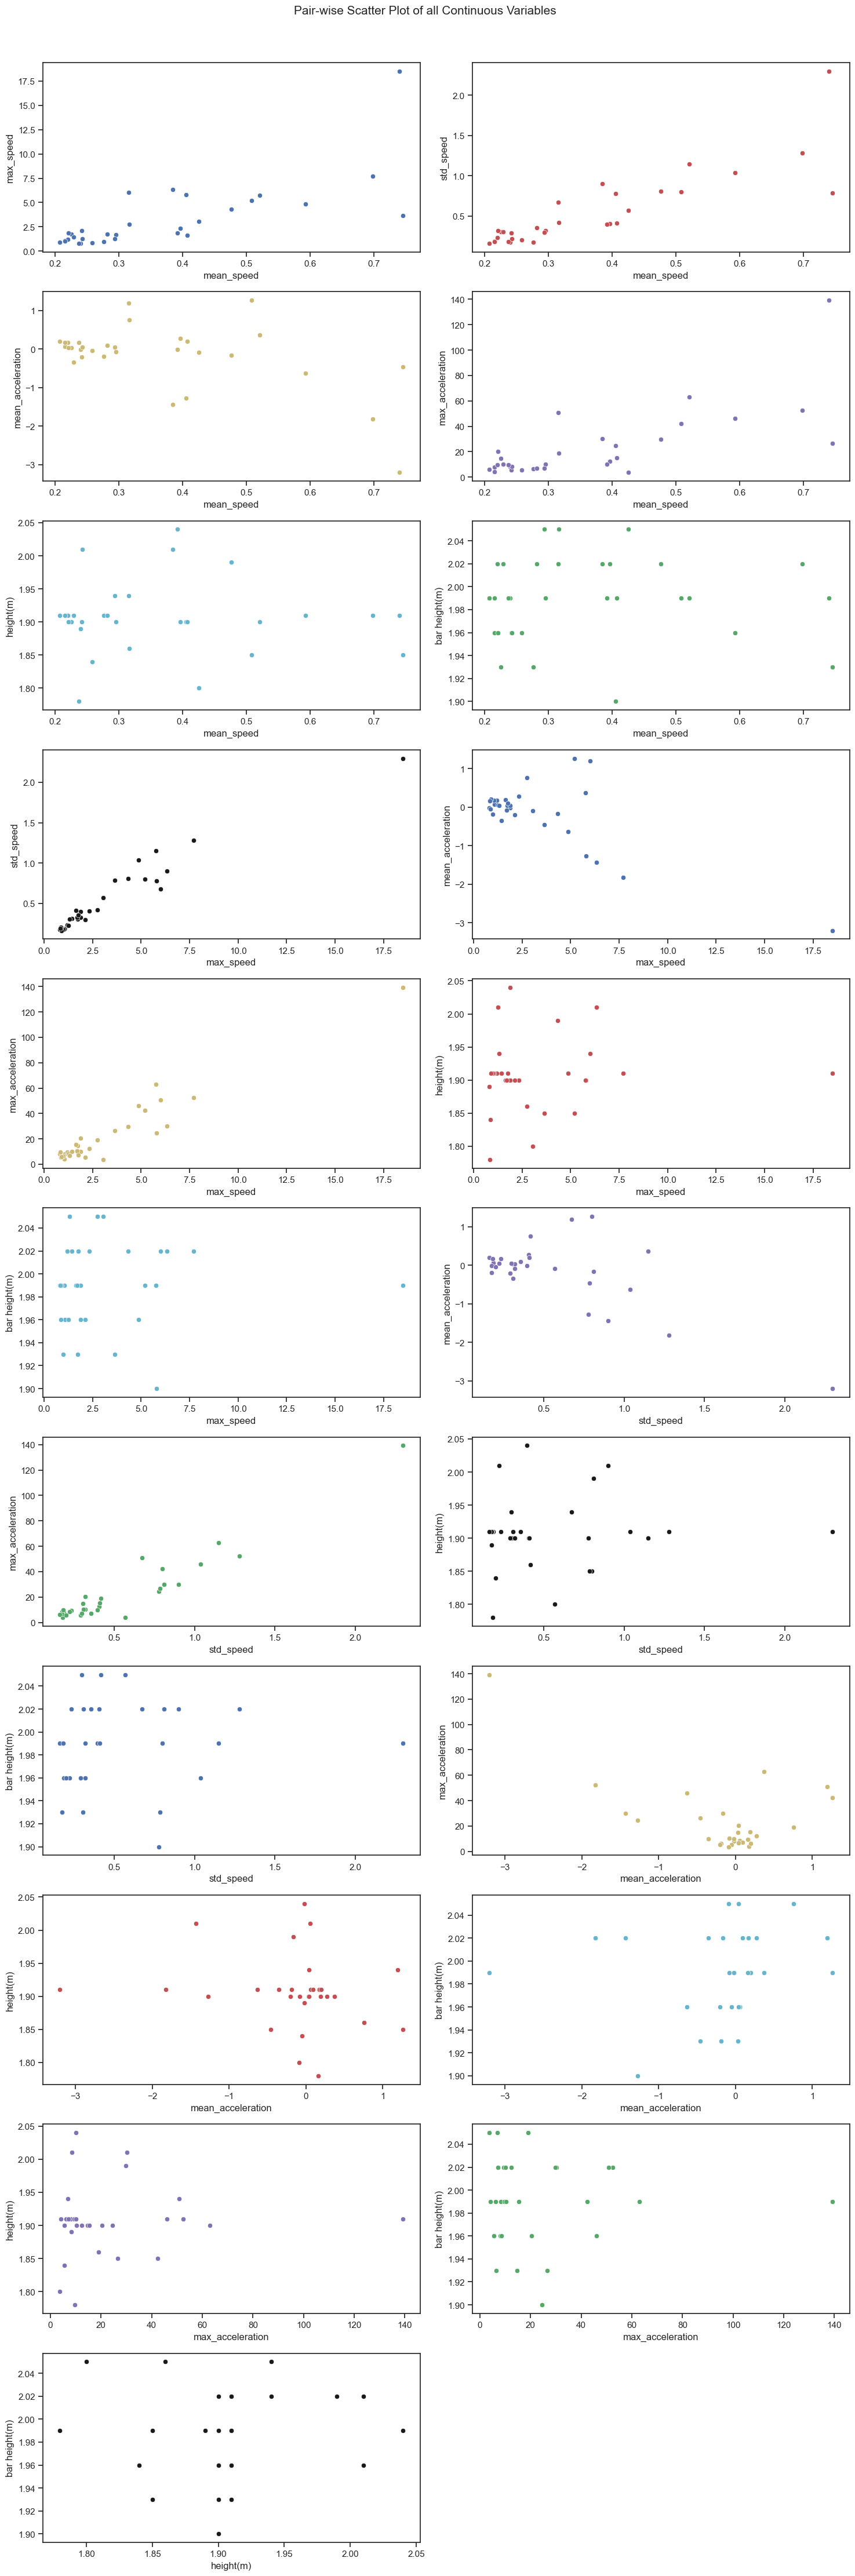

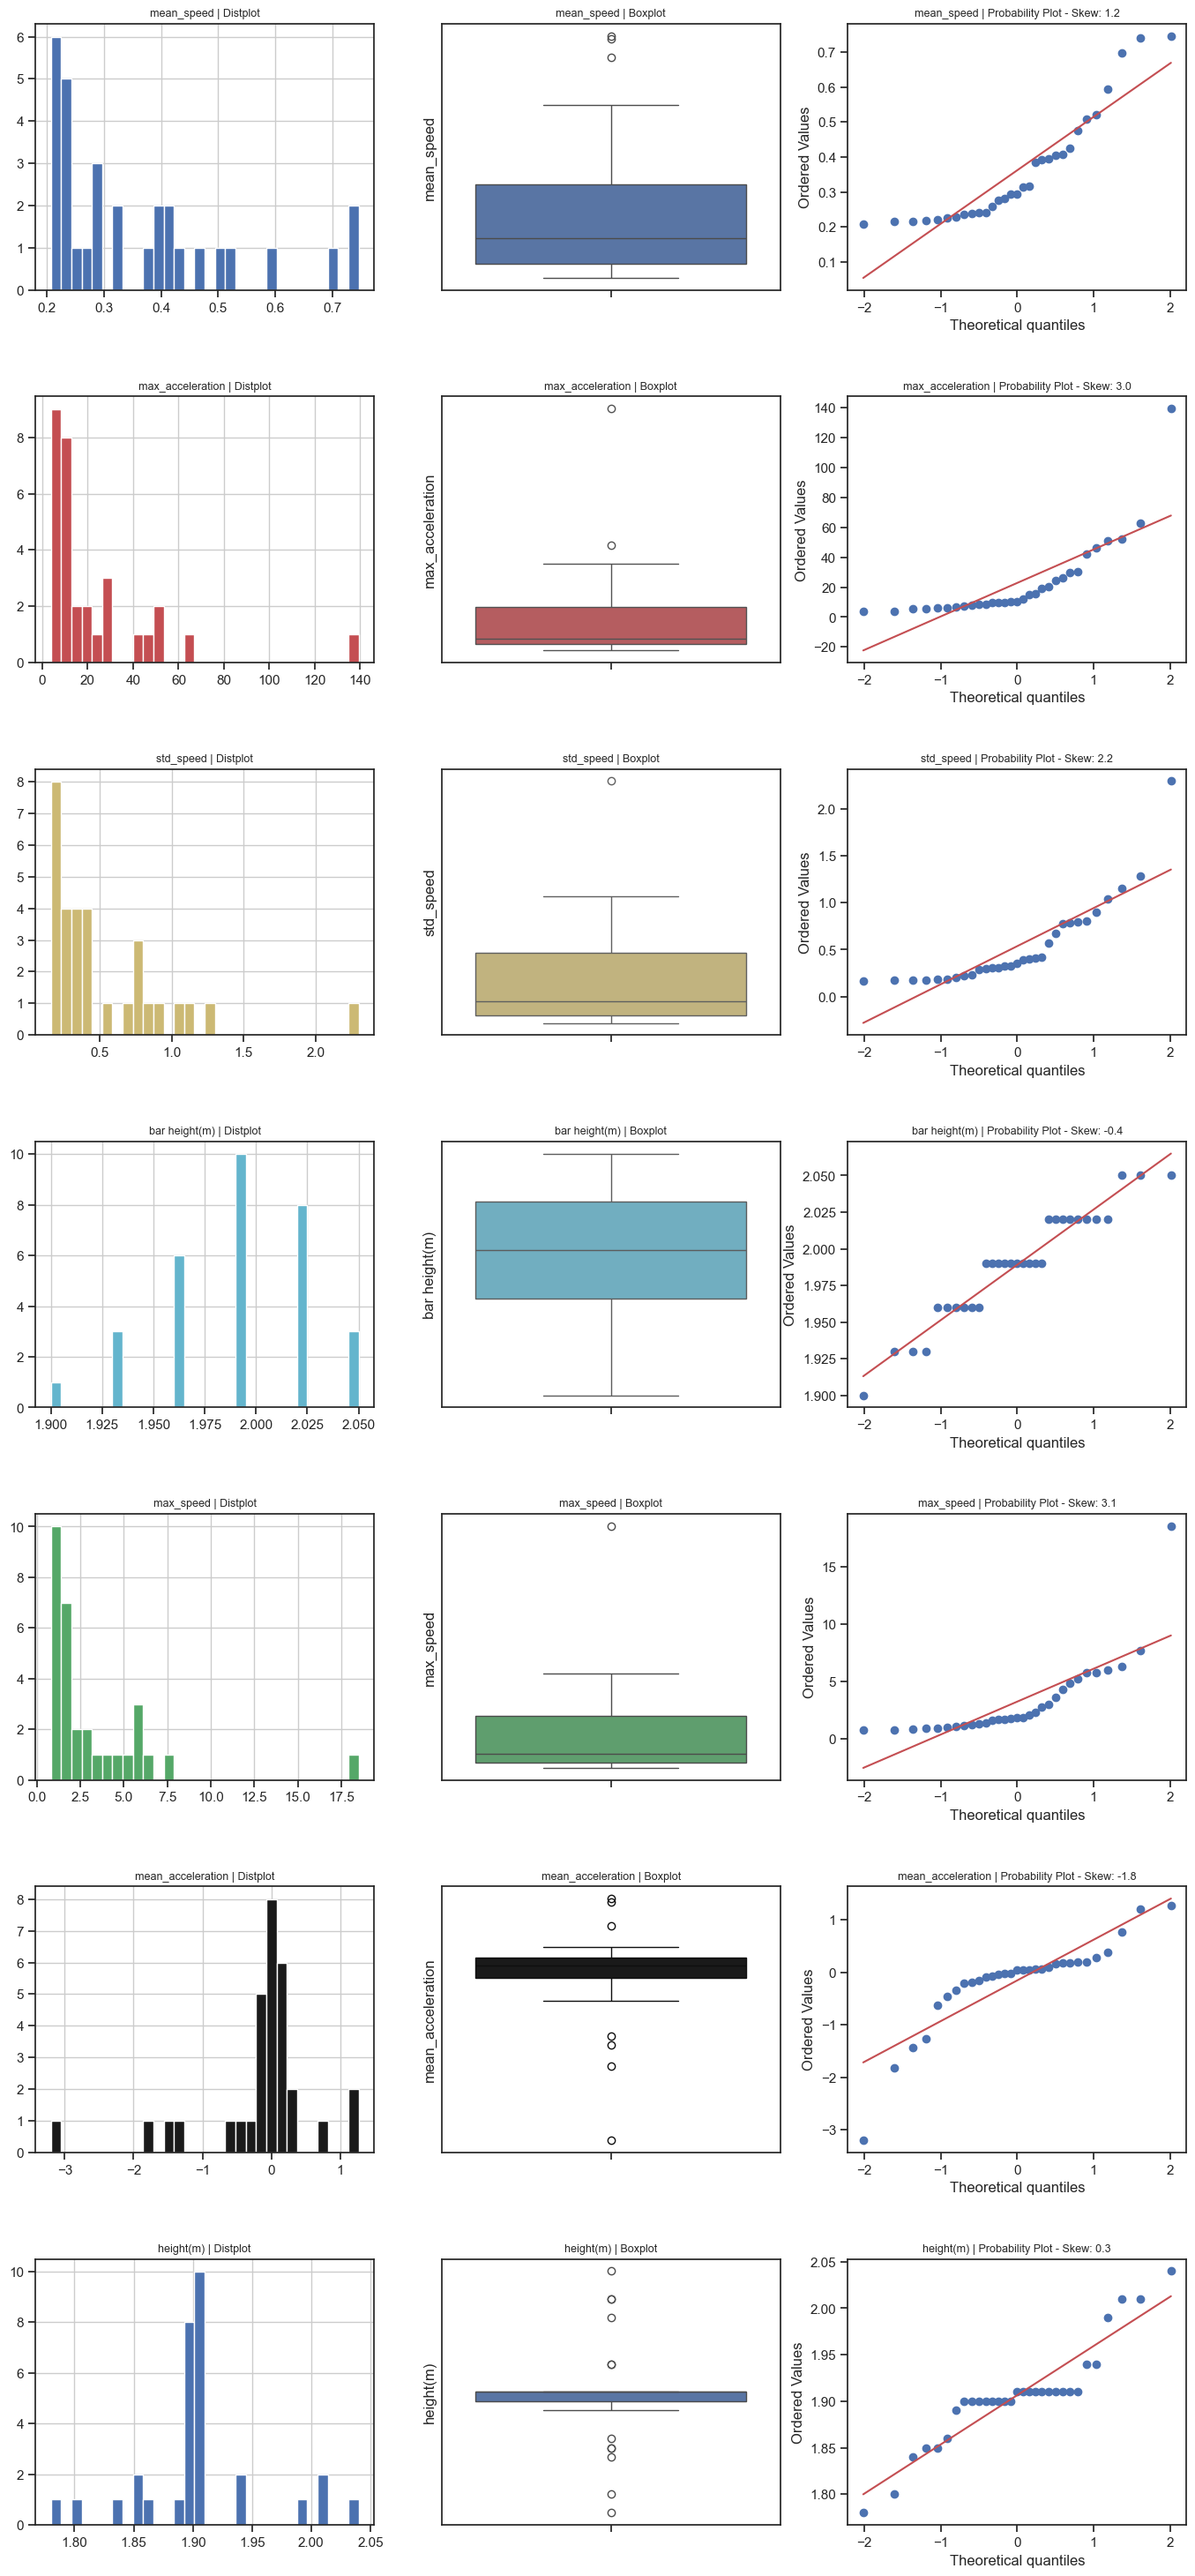

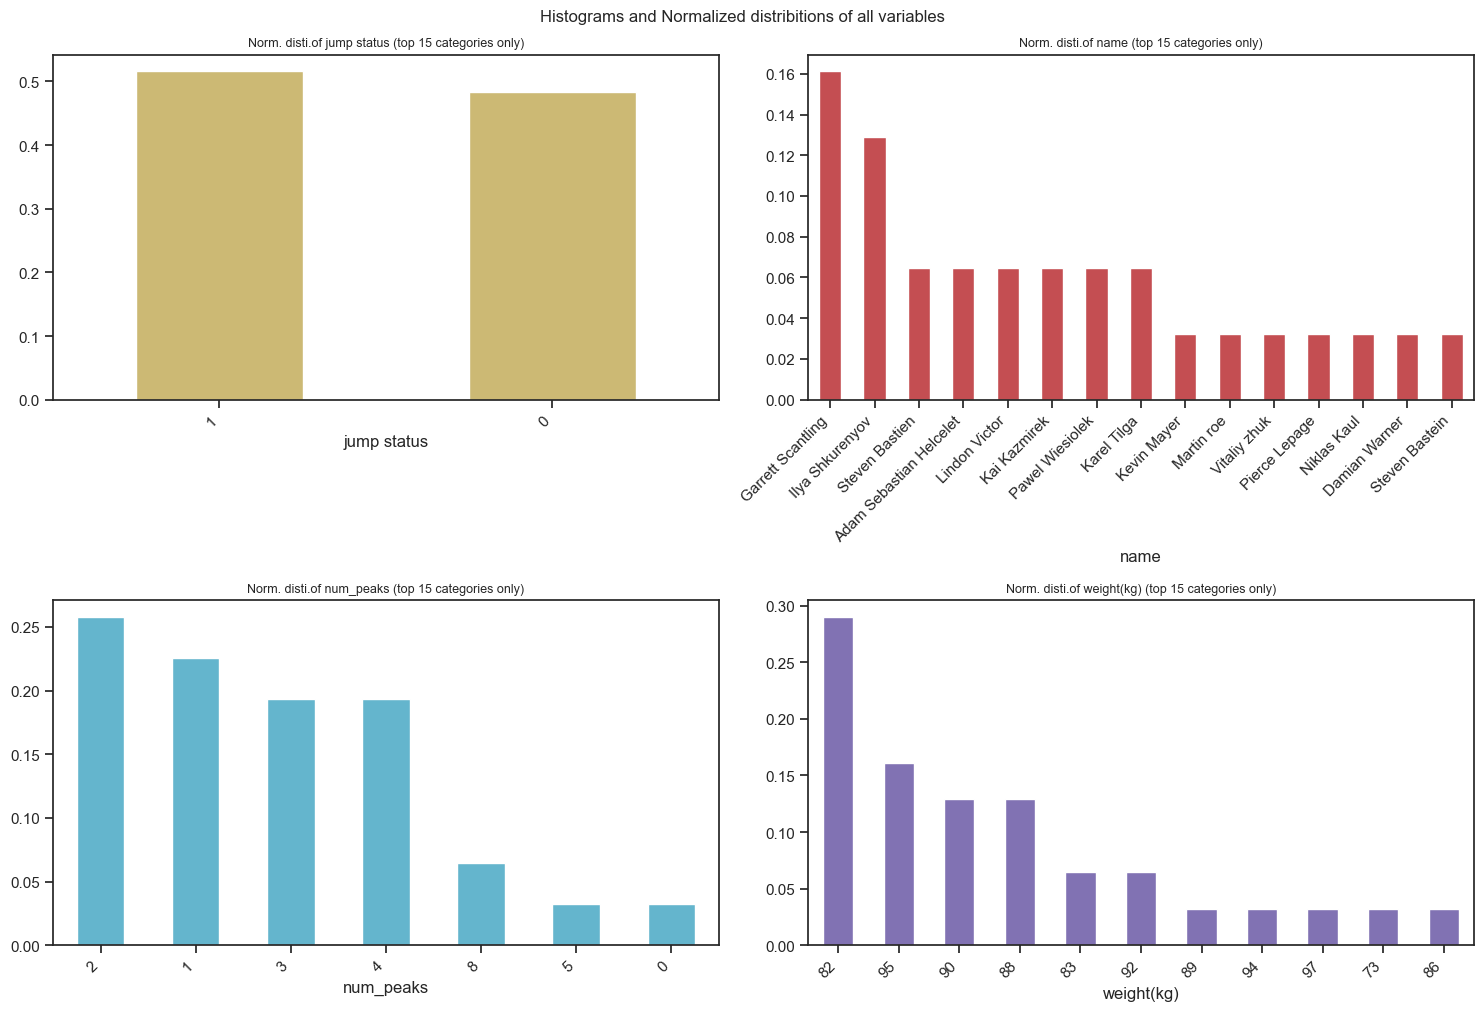

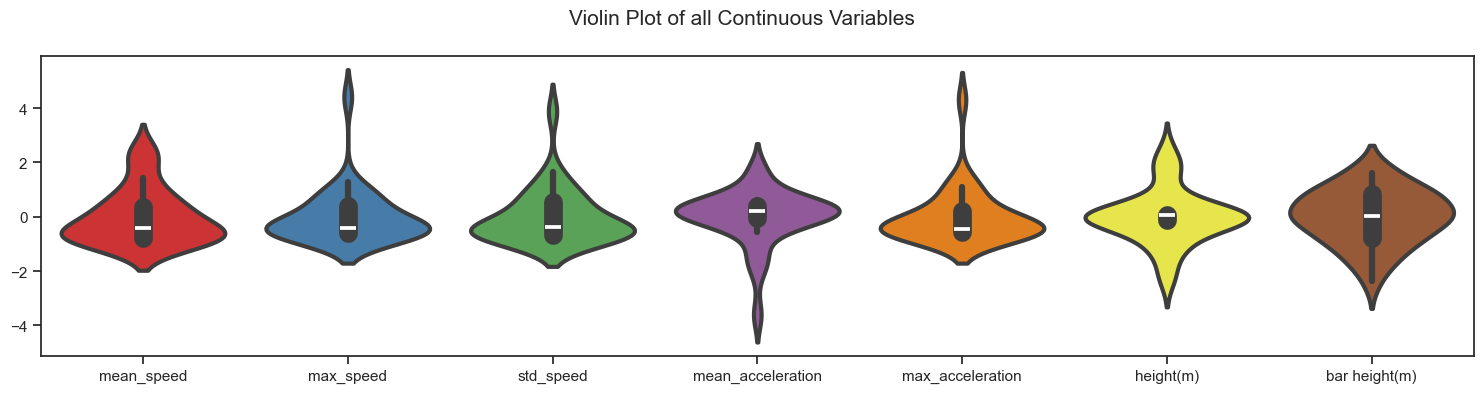

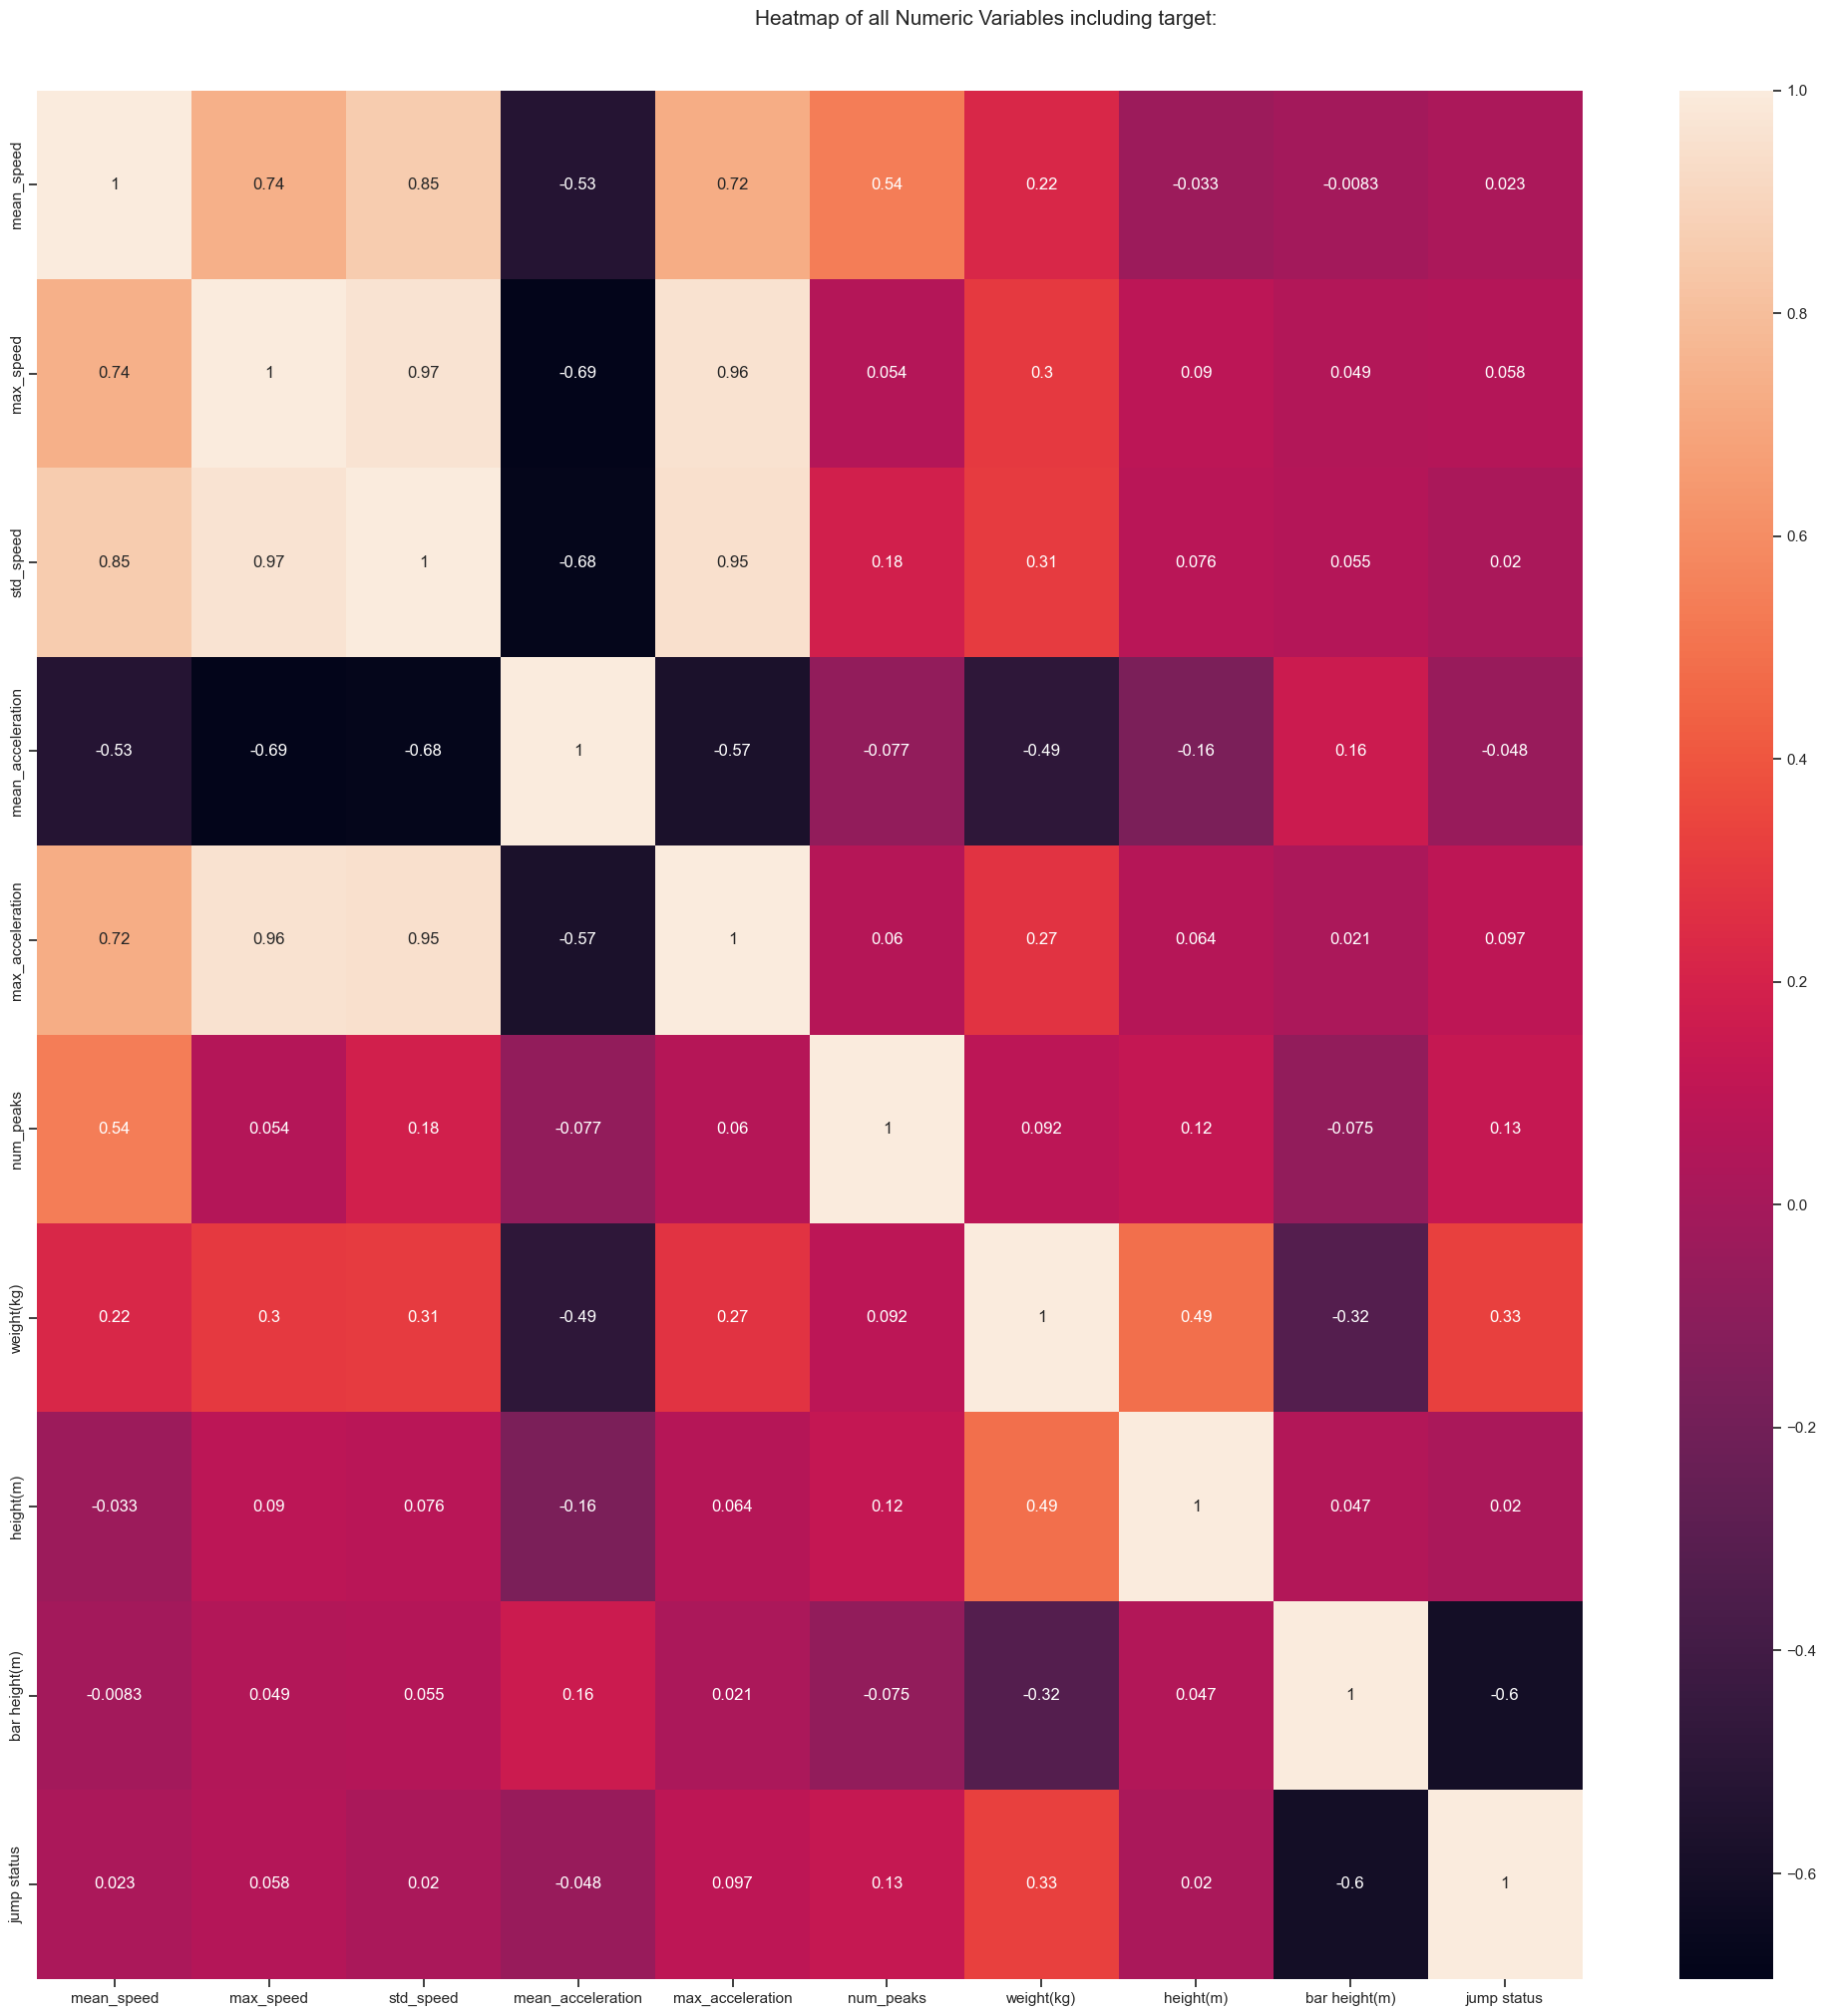

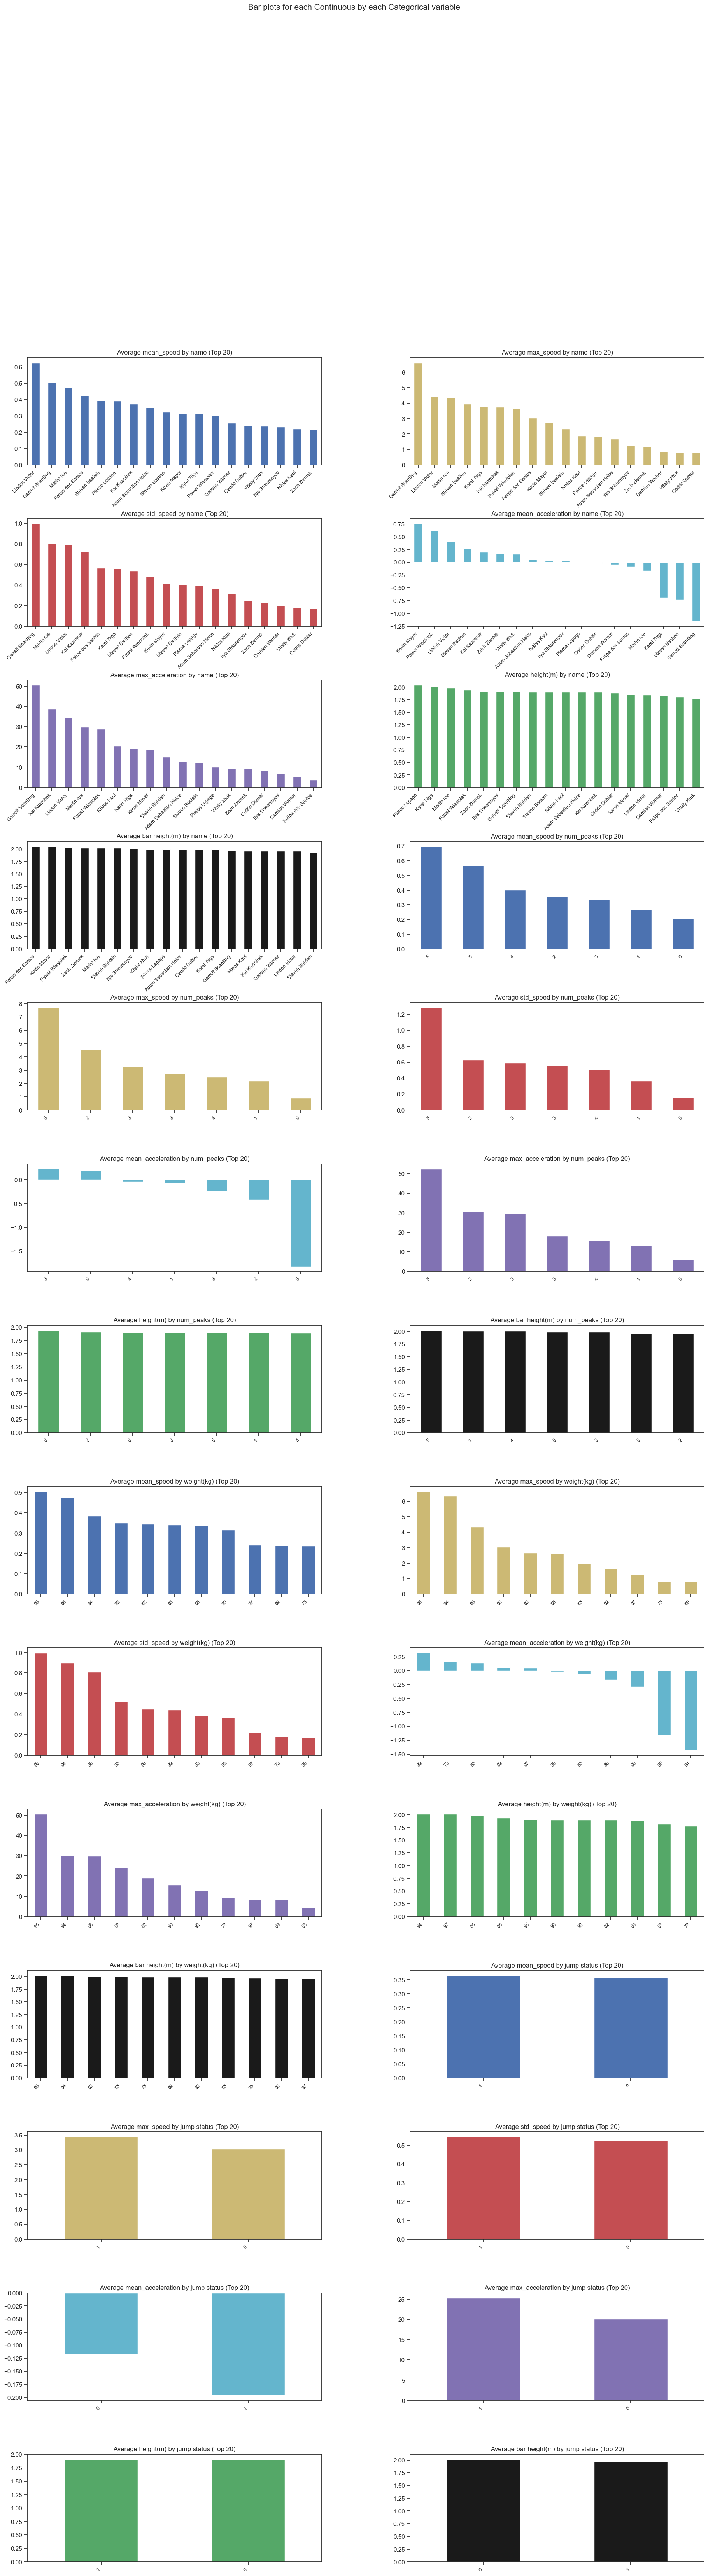

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline 
filename = "dataset.csv"
sep=","
dft = AV.AutoViz(
    filename
)

In [9]:
from sklearn.model_selection import train_test_split

In [21]:
df=df.drop(columns=["num_peaks"])

In [22]:
df.head()

,mean_speed,max_speed,std_speed,mean_acceleration,max_acceleration,weight(kg),height(m),bar height(m),jump status
0,0.405274,5.796135,0.779352,-1.269454,24.568870,90,1.90,1.90,1
1,0.215259,1.084163,0.186131,0.066196,8.038075,95,1.91,1.96,1
2,0.739617,18.499514,2.297320,-3.200867,139.266500,95,1.91,1.99,1
3,0.507853,5.204675,0.800430,1.263667,42.241979,82,1.85,1.99,1
4,0.520975,5.760938,1.148973,0.369910,62.914924,88,1.90,1.99,1


In [30]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
X[0]

array([ 0.40527417,  5.7961349 ,  0.77935168, -1.26945392, 24.56887016,
       90.        ,  1.9       ,  1.9       ])

In [24]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.1,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()

In [27]:
xtrain[:,4:7]=sc.fit_transform(xtrain[:,4:7])

In [29]:
xtrain[0]

array([ 0.39568832,  2.3385062 ,  0.40475595,  0.2756635 , -0.39710547,
        0.55690897, -0.04813754,  2.02      ])

In [33]:
xtest[:,4:7]=sc.transform(xtest[:,4:7])

In [35]:
xtest[0]

array([  0.22856403,   1.4295181 ,   0.30730183,  -0.35023285,
        -0.85812476, -16.11349488, -32.77240585,   2.02      ])

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Replace these with your data
# Ensure X_train, X_test, y_train, y_test are defined before running this code

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Metrics storage
results = []


In [42]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(xtrain, ytrain)
    
    # Predictions
    y_pred = model.predict(xtest)
    y_pred_prob = model.predict_proba(xtest)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_pred_prob) if y_pred_prob is not None else None

    # Append results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(ytest, y_pred))
    print("-" * 50)


Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

--------------------------------------------------
Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

--------------------------------------------------
Training Support Vector Machine...

Support Vector Machine Classification Report:

              preci

In [43]:
results_df = pd.DataFrame(results)
print("\nSummary of Results:\n")
print(results_df)

# Optional: Save results to CSV
results_df.to_csv("model_evaluation_results.csv", index=False)


Summary of Results:

           Model           Accuracy  Precision  Recall  F1 Score   ROC AUC
0     Logistic Regression    0.75      0.00       0.0   0.000000  0.000000
1     Logistic Regression    0.75      0.00       0.0   0.000000  0.000000
2           Random Forest    0.75      0.50       1.0   0.666667  0.666667
3  Support Vector Machine    0.25      0.25       1.0   0.400000  1.000000
4     K-Nearest Neighbors    0.50      0.00       0.0   0.000000  0.000000
5           Decision Tree    0.75      0.50       1.0   0.666667  0.833333
